In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#read in wine csv
wine_df=pd.read_csv("../Resources/Winedata.csv")
wine_df.head()

,id,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# read weather csv from S3 - which is super cool, thanks Marisa
weather_df=pd.read_csv("https://grp2weather.s3.amazonaws.com/combined_weather.csv")
weather_df.head()

,Prov_Weather,Year_Weather,Precipitation,Temperature,Timeseries
0,Alsace,1901,864.18,8.41,Historical
1,Alsace,1902,737.39,8.57,Historical
2,Alsace,1903,757.38,8.90,Historical
3,Alsace,1904,704.56,9.39,Historical
4,Alsace,1905,840.87,8.72,Historical


In [4]:
#extract year column from title field, pop title
wine_df['Year']=wine_df['title'].str.extract(r'([1-2]\d{3})')
wine_df.pop('title')
wine_df.head()

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,Year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012


In [5]:
#filter wine_df for regions we want to examine
regions=['California','Washington','Bordeaux','Tuscany','Oregon','Burgundy','Cantabria','Piedmont','Veneto','New York','Alsace','Sicily & Sardinia','Champagne']
wine_df_regions=wine_df[wine_df['province'].isin(regions)]
wine_df_regions

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,Year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,2013
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012
6,6,Italy,"Here''s a bright, informal red that opens with...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Frappato,Terre di Giurfo,2013
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Trimbach,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
129964,129965,France,"While it''s rich, this beautiful dry wine also...",Seppi Landmann VallÃ©e Noble,90,28.0,Alsace,Alsace,NaN,Pinot Gris,Domaine RieflÃ©-Landmann,2013
129966,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,2004
129967,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Domaine Gresser,2013
129968,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,2012


In [6]:
# drop records with no year
wine_df_regions.dropna(subset=['Year'],inplace=True)
wine_df_regions

/Users/kyle/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,Year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,2013
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012
6,6,Italy,"Here''s a bright, informal red that opens with...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Frappato,Terre di Giurfo,2013
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Trimbach,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
129964,129965,France,"While it''s rich, this beautiful dry wine also...",Seppi Landmann VallÃ©e Noble,90,28.0,Alsace,Alsace,NaN,Pinot Gris,Domaine RieflÃ©-Landmann,2013
129966,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,2004
129967,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Domaine Gresser,2013
129968,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,2012


In [7]:
#drop records from before 1990
wine_df_regions=wine_df_regions[wine_df_regions['Year']>'1990']
wine_df_regions

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,Year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,2013
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012
6,6,Italy,"Here''s a bright, informal red that opens with...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Frappato,Terre di Giurfo,2013
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Trimbach,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
129964,129965,France,"While it''s rich, this beautiful dry wine also...",Seppi Landmann VallÃ©e Noble,90,28.0,Alsace,Alsace,NaN,Pinot Gris,Domaine RieflÃ©-Landmann,2013
129966,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,2004
129967,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Domaine Gresser,2013
129968,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,2012


In [8]:
#make list of columns to drop and drop them
columns_to_drop=['country','description','designation','price','region_2','region_1','winery']
wine_df_regions.drop(columns_to_drop,axis=1,inplace=True)
wine_df_regions

/Users/kyle/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,points,province,variety,Year
0,0,87,Sicily & Sardinia,White Blend,2013
2,2,87,Oregon,Pinot Gris,2013
4,4,87,Oregon,Pinot Noir,2012
6,6,87,Sicily & Sardinia,Frappato,2013
7,7,87,Alsace,GewÃ¼rztraminer,2012
...,...,...,...,...,...
129964,129965,90,Alsace,Pinot Gris,2013
129966,129967,90,Oregon,Pinot Noir,2004
129967,129968,90,Alsace,GewÃ¼rztraminer,2013
129968,129969,90,Alsace,Pinot Gris,2012


In [9]:
wine_df_regions.columns

Index(['id', 'points', 'province', 'variety', 'Year'], dtype='object')

### Target
- points

### Variables
- province - categorical 
- region_1 - categorical 
- variety - categorical 
- winery - categorical 
- Year - categorical 

### Maybe Not Variables
- description
- designation
- price

### Definitely Not Variables
- id
- country
- region_2

In [10]:
#replace wine region values with matching regions from weather data
#Piedmont needs to be Piemonte
wine_df_regions.loc[wine_df_regions['province']=='Piedmont','province']="Piemonte"
wine_df_regions.loc[wine_df_regions['province']=='Sicily & Sardinia','province']="Sicilia"
wine_df_regions.loc[wine_df_regions['province']=='Bordeaux','province']="Aquitaine"
wine_df_regions.loc[wine_df_regions['province']=='Northern Spain','province']="Cantabria"
wine_df_regions.loc[wine_df_regions['province']=='Champagne','province']="Champagne-Ardenne"
wine_df_regions

/Users/kyle/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,points,province,variety,Year
0,0,87,Sicilia,White Blend,2013
2,2,87,Oregon,Pinot Gris,2013
4,4,87,Oregon,Pinot Noir,2012
6,6,87,Sicilia,Frappato,2013
7,7,87,Alsace,GewÃ¼rztraminer,2012
...,...,...,...,...,...
129964,129965,90,Alsace,Pinot Gris,2013
129966,129967,90,Oregon,Pinot Noir,2004
129967,129968,90,Alsace,GewÃ¼rztraminer,2013
129968,129969,90,Alsace,Pinot Gris,2012


In [11]:
wine_df_regions[wine_df_regions['province']=='Piemonte']

,id,points,province,variety,Year
122,120,92,Piemonte,Nebbiolo,2003
133,130,91,Piemonte,Nebbiolo,2003
136,133,91,Piemonte,Nebbiolo,2003
138,135,91,Piemonte,Nebbiolo,2001
143,140,90,Piemonte,Barbera,2005
...,...,...,...,...,...
129809,129809,89,Piemonte,Nebbiolo,2006
129818,129819,89,Piemonte,Nebbiolo,2008
129821,129822,89,Piemonte,Nebbiolo,2008
129823,129824,89,Piemonte,Nebbiolo,2006


In [12]:
variety_vcs=wine_df_regions['variety'].value_counts()
variety_vcs
#Bin variety to elminate <2200

Pinot Noir                   11514
Chardonnay                    9102
Cabernet Sauvignon            7340
Bordeaux-style Red Blend      6337
Red Blend                     5821
                             ...  
Albanello                        1
Malbec-Cabernet Sauvignon        1
Syrah-Petit Verdot               1
Vespaiolo                        1
Alvarinho                        1
Name: variety, Length: 312, dtype: int64

In [13]:
variety_counts=wine_df_regions.variety.value_counts()
replace_varieties=list(variety_counts[variety_counts<2200].index)
replace_varieties

['Pinot Gris',
 'RosÃ©',
 'Bordeaux-style White Blend',
 'White Blend',
 'Cabernet Franc',
 'GewÃ¼rztraminer',
 'Sangiovese Grosso',
 'Petite Sirah',
 'Barbera',
 'Viognier',
 'RhÃ´ne-style Red Blend',
 'Corvina, Rondinella, Molinara',
 'Malbec',
 'Grenache',
 'Champagne Blend',
 'Sparkling Blend',
 'Pinot Grigio',
 'Pinot Blanc',
 "Nero d'Avola",
 'Tempranillo',
 'Glera',
 'Garganega',
 'Meritage',
 'Moscato',
 'RhÃ´ne-style White Blend',
 'MourvÃ¨dre',
 'Petit Verdot',
 'Vermentino',
 'Dolcetto',
 'G-S-M',
 'Roussanne',
 'Vernaccia',
 'Grillo',
 'AlbariÃ±o',
 'Grenache Blanc',
 'Chenin Blanc',
 'Primitivo',
 'GrÃ¼ner Veltliner',
 'Nerello Mascalese',
 'SÃ©millon',
 'Arneis',
 'Cortese',
 'Muscat',
 'FumÃ© Blanc',
 'Cabernet Sauvignon-Syrah',
 'Rosato',
 'Alsace white blend',
 'Shiraz',
 'CarmenÃ¨re',
 'Port',
 'Prugnolo Gentile',
 'Tannat',
 'Sylvaner',
 'Pinot Nero',
 'Marsanne',
 'Sauvignon Blanc-Semillon',
 'Semillon-Sauvignon Blanc',
 'Prosecco',
 'Frappato',
 'Cabernet Sauvignon

In [14]:
variety_vcs=wine_df_regions['variety'].unique()

In [15]:
wine_df_regions.describe()

,id,points
count,78037.000000,78037.000000
mean,65072.343773,88.818458
std,37560.987763,3.056432
min,0.000000,80.000000
25%,32626.000000,87.000000
50%,65002.000000,89.000000
75%,97670.000000,91.000000
max,129970.000000,100.000000


In [16]:
y=wine_df_regions['points']

(array([  458.,  2395.,  8042., 16513., 17367., 17129., 11293.,  4128.,
          603.,   109.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

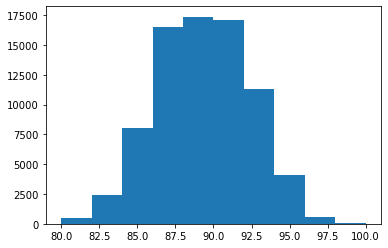

In [19]:
plt.hist(y)